**Attempt to run the same benchmark I used on my PC on my Mac**

In [1]:
import torch

In [ ]:


if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device = mps_device)
    print(x)
else:
    print("MPS device not found")

In [2]:
# installing/upgrading fastai2 
!pip install --upgrade fastai

In [3]:
%matplotlib inline
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

torch.backends.cudnn.benchmark = True

/Users/rff/anaconda3/envs/MacML/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/rff/anaconda3/envs/MacML/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/rff/anaconda3/envs/MacML/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <F8622D92-25A9-3A61-A089-C917FDA36C1B> /Users/rff/anaconda3/envs/MacML/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [4]:
# Test to ensure that my cuda is still visible
import torch as torch
torch.cuda.is_available()

False

In [ ]:
torch.device("mps")
default_device(-1)
defaults.device = 'mps'
# torch.cuda.device(0) to select the first GPU (and only GPU on my system)
#torch.cuda.current_device()

In [5]:
cpu = torch.device("cpu")


In [6]:
path = untar_data(URLs.CIFAR)
path

Path('/Users/rff/.fastai/data/cifar10')

In [7]:
bs = 256


In [8]:
ds_tfms = ([OldRandomCrop(4, 32), FlipItem(p=0.5)], [])
data = ImageDataLoaders.from_folder(path, valid='test', item_tfms=ds_tfms, bs=bs)


In [9]:
learn = Learner(data, xresnet152(pretrained=True).to("cpu"), metrics=accuracy)

SuggestedLRs(valley=0.0004786300996784121)

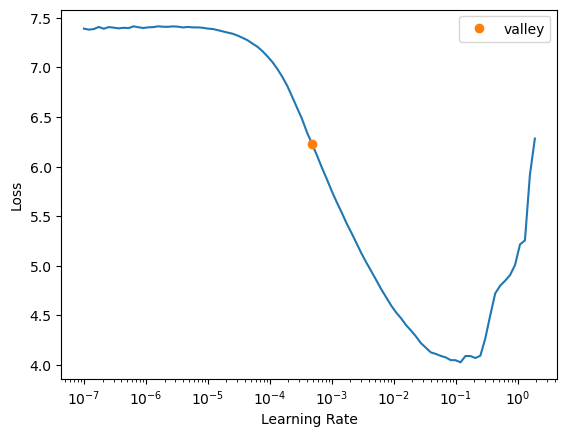

In [10]:
learn.lr_find()

I'm happy that the first run worked--this test did not take significant effort to implement on the Mac
with GPU activated.  The time is about half the speed (twice as slow) as on my NVidia 1080Ti.  

The first test was intended to be CPU-only, to establish a baseline. However, it appears to have used the GPU. 
To double check I ran this again explicitly specifying the GPU ('mps'), and received the same results.

My guess is that something about the libraries used in this test always route to the GPU.  
I will have to review the steps I took to create this anaconda environment, and see if I can figure out how to specify
GPU vs. CPU executions.

In [ ]:
%%timeit  -n 1 -r 1

learn.fit_one_cycle(8, 0.000575439, wd=0.4, div=10, pct_start=0.5)